In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, MaxNLocator

In [2]:
vel_primal_exact = np.load('../results/vel_primal_exact.npy')
vel_dual_exact = np.load('../results/vel_dual_exact.npy')
vel_primal_approx = np.load('../results/vel_primal_approx.npy')
vel_dual_approx = np.load('../results/vel_dual_approx.npy')

vel_primal_exact_eta = np.load('../results/vel_primal_exact_eta.npy')
vel_dual_exact_eta = np.load('../results/vel_dual_exact_eta.npy')
vel_primal_approx_eta = np.load('../results/vel_primal_approx_eta.npy')
vel_dual_approx_eta = np.load('../results/vel_dual_approx_eta.npy')

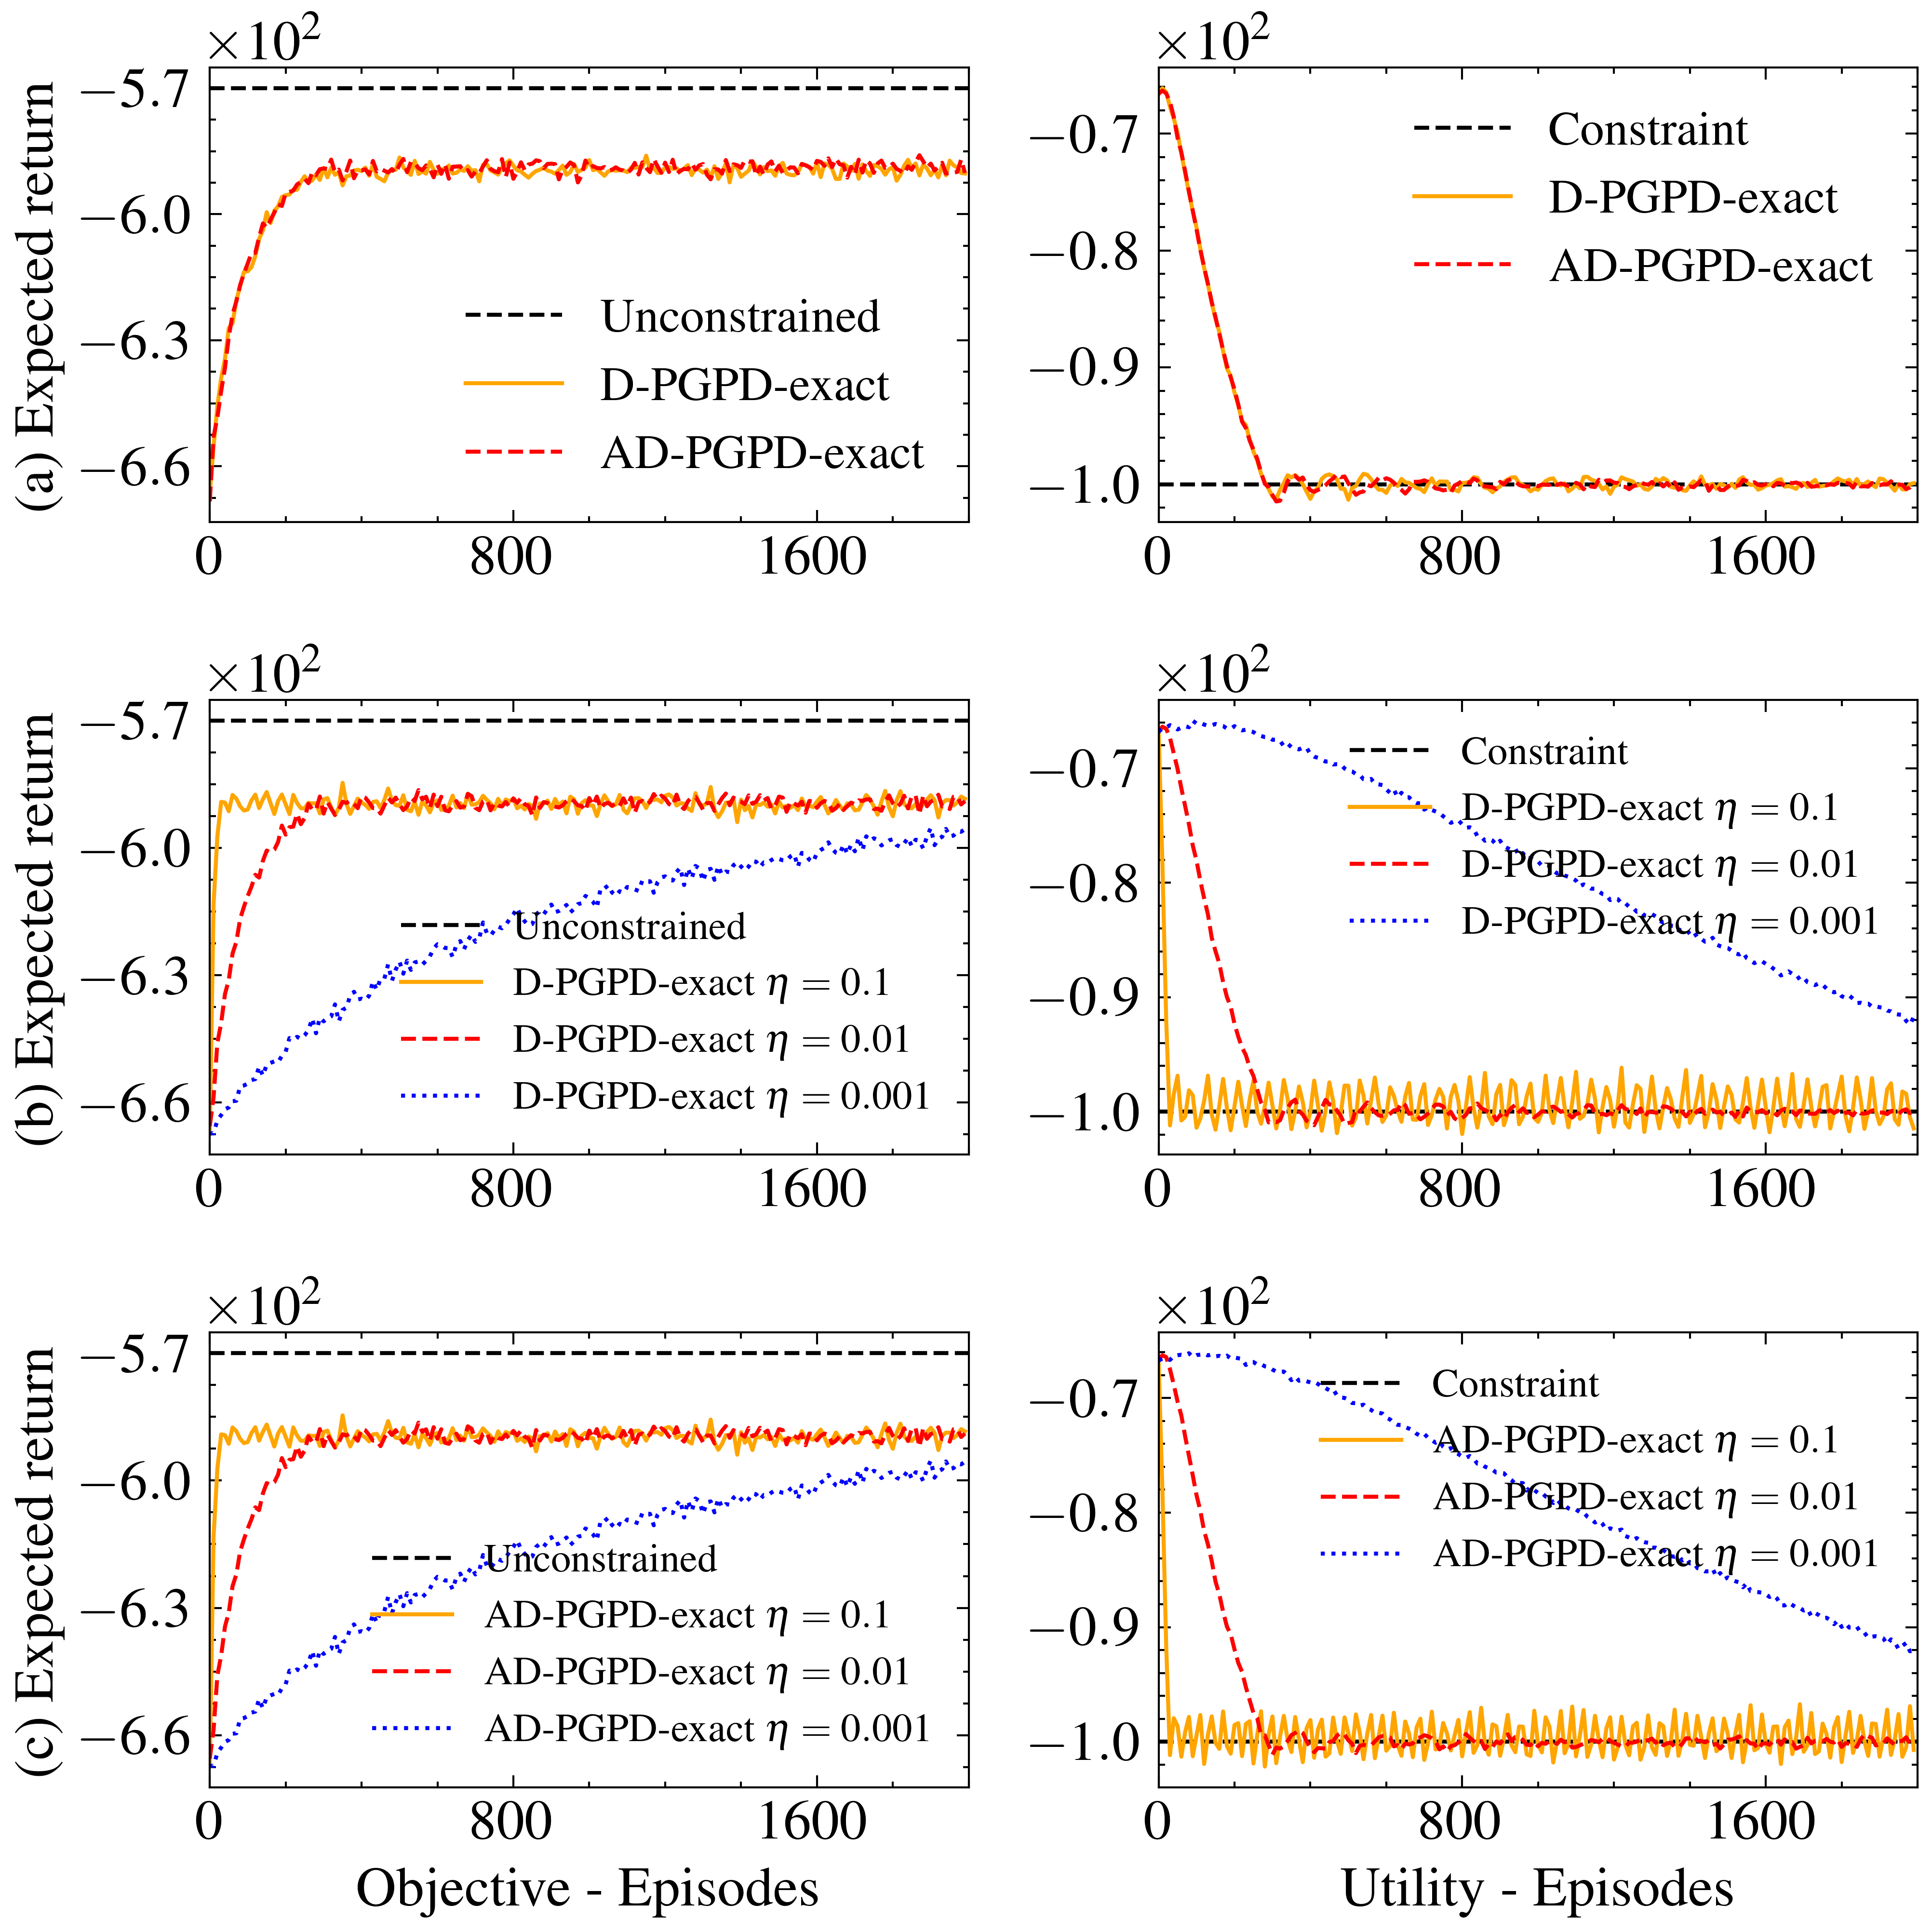

In [81]:
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[7, 7])

    axes[0, 0].axhline(y=-570, color='k', linestyle='--', label='Unconstrained')
    axes[0, 0].plot(np.arange(0, 2000, 10), vel_primal_exact, label='D-PGPD-exact', color='orange')
    axes[0, 0].plot(np.arange(0, 2000, 10), vel_primal_approx, label='AD-PGPD-exact')
    axes[0, 0].set_xlim(0, 2000)
    axes[0, 0].legend(loc='lower right', fontsize=12)
    axes[0, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[0, 0].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0, 0].set_ylabel('(a) Expected return')

    axes[0, 1].axhline(y=-100, color='k', linestyle='--', label='Constraint')
    axes[0, 1].plot(np.arange(0, 2000, 10), vel_dual_exact, label='D-PGPD-exact', color='orange')
    axes[0, 1].plot(np.arange(0, 2000, 10), vel_dual_approx, label='AD-PGPD-exact')
    axes[0, 1].set_xlim(0, 2000)
    axes[0, 1].legend(fontsize=12)
    axes[0, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    #################

    axes[1, 0].axhline(y=-570, color='k', linestyle='--', label='Unconstrained')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[0, :], label='D-PGPD-exact $\eta=0.1$', color='orange')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[1, :], label='D-PGPD-exact $\eta=0.01$')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[2, :], label='D-PGPD-exact $\eta=0.001$')
    axes[1, 0].set_xlim(0, 2000)
    axes[1, 0].legend(fontsize=10)
    axes[1, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[1, 0].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1, 0].set_ylabel('(b) Expected return')

    axes[1, 1].axhline(y=-100, color='k', linestyle='--', label='Constraint')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_eta[0, :], label='D-PGPD-exact $\eta=0.1$', color='orange')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_eta[1, :], label='D-PGPD-exact $\eta=0.01$')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_eta[2, :], label='D-PGPD-exact $\eta=0.001$')
    axes[1, 1].set_xlim(0, 2000)
    axes[1, 1].legend(loc='upper right', fontsize=10)
    axes[1, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1, 1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    #################

    axes[2, 0].axhline(y=-570, color='k', linestyle='--', label='Unconstrained')
    axes[2, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[0, :], label='AD-PGPD-exact $\eta=0.1$', color='orange')
    axes[2, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[1, :], label='AD-PGPD-exact $\eta=0.01$')
    axes[2, 0].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[2, :], label='AD-PGPD-exact $\eta=0.001$')
    axes[2, 0].set_xlim(0, 2000)
    axes[2, 0].legend(fontsize=10)
    axes[2, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[2, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[2, 0].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[2, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[2, 0].set_xlabel('Objective - Episodes')
    axes[2, 0].set_ylabel('(c) Expected return')

    axes[2, 1].axhline(y=-100, color='k', linestyle='--', label='Constraint')
    axes[2, 1].plot(np.arange(0, 2000, 10), vel_dual_approx_eta[0, :], label='AD-PGPD-exact $\eta=0.1$', color='orange')
    axes[2, 1].plot(np.arange(0, 2000, 10), vel_dual_approx_eta[1, :], label='AD-PGPD-exact $\eta=0.01$')
    axes[2, 1].plot(np.arange(0, 2000, 10), vel_dual_approx_eta[2, :], label='AD-PGPD-exact $\eta=0.001$')
    axes[2, 1].set_xlim(0, 2000)
    axes[2, 1].legend(loc='upper right', fontsize=10)
    axes[2, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[2, 1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[2, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[2, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[2, 1].set_xlabel('Utility - Episodes')

    plt.tight_layout()
    plt.show()

In [41]:
import numpy as np
from scipy.ndimage import uniform_filter1d

In [65]:
vel_sampled_primal = np.load('../results/vel_sampled_primal.npy')
vel_sampled_dual = np.load('../results/vel_sampled_dual.npy')
vel_sampled_primal_nn = np.load('../results/vel_sampled_primal_nn.npy')
vel_sampled_dual_nn = np.load('../results/vel_sampled_dual_nn.npy')

obs_sampled_primal = np.load('../results/obs_primal.npy')
obs_sampled_dual = np.load('../results/obs_dual.npy')
obs_sampled_primal_nn = np.load('../results/obs_primal_nn.npy')
obs_sampled_dual_nn = np.load('../results/obs_dual_nn.npy')

In [21]:
N = 5

vel_sampled_primal = uniform_filter1d(vel_sampled_primal, size=N)
vel_sampled_dual = uniform_filter1d(vel_sampled_dual, size=N)
vel_sampled_primal_nn = uniform_filter1d(vel_sampled_primal_nn, size=N)
vel_sampled_dual_nn = uniform_filter1d(vel_sampled_dual_nn, size=N)

obs_sampled_primal = uniform_filter1d(obs_sampled_primal, size=N)
obs_sampled_dual = uniform_filter1d(obs_sampled_dual, size=N)
obs_sampled_primal_nn = uniform_filter1d(obs_sampled_primal_nn, size=N)
obs_sampled_dual_nn = uniform_filter1d(obs_sampled_dual_nn, size=N)

NameError: name 'uniform_filter1d' is not defined

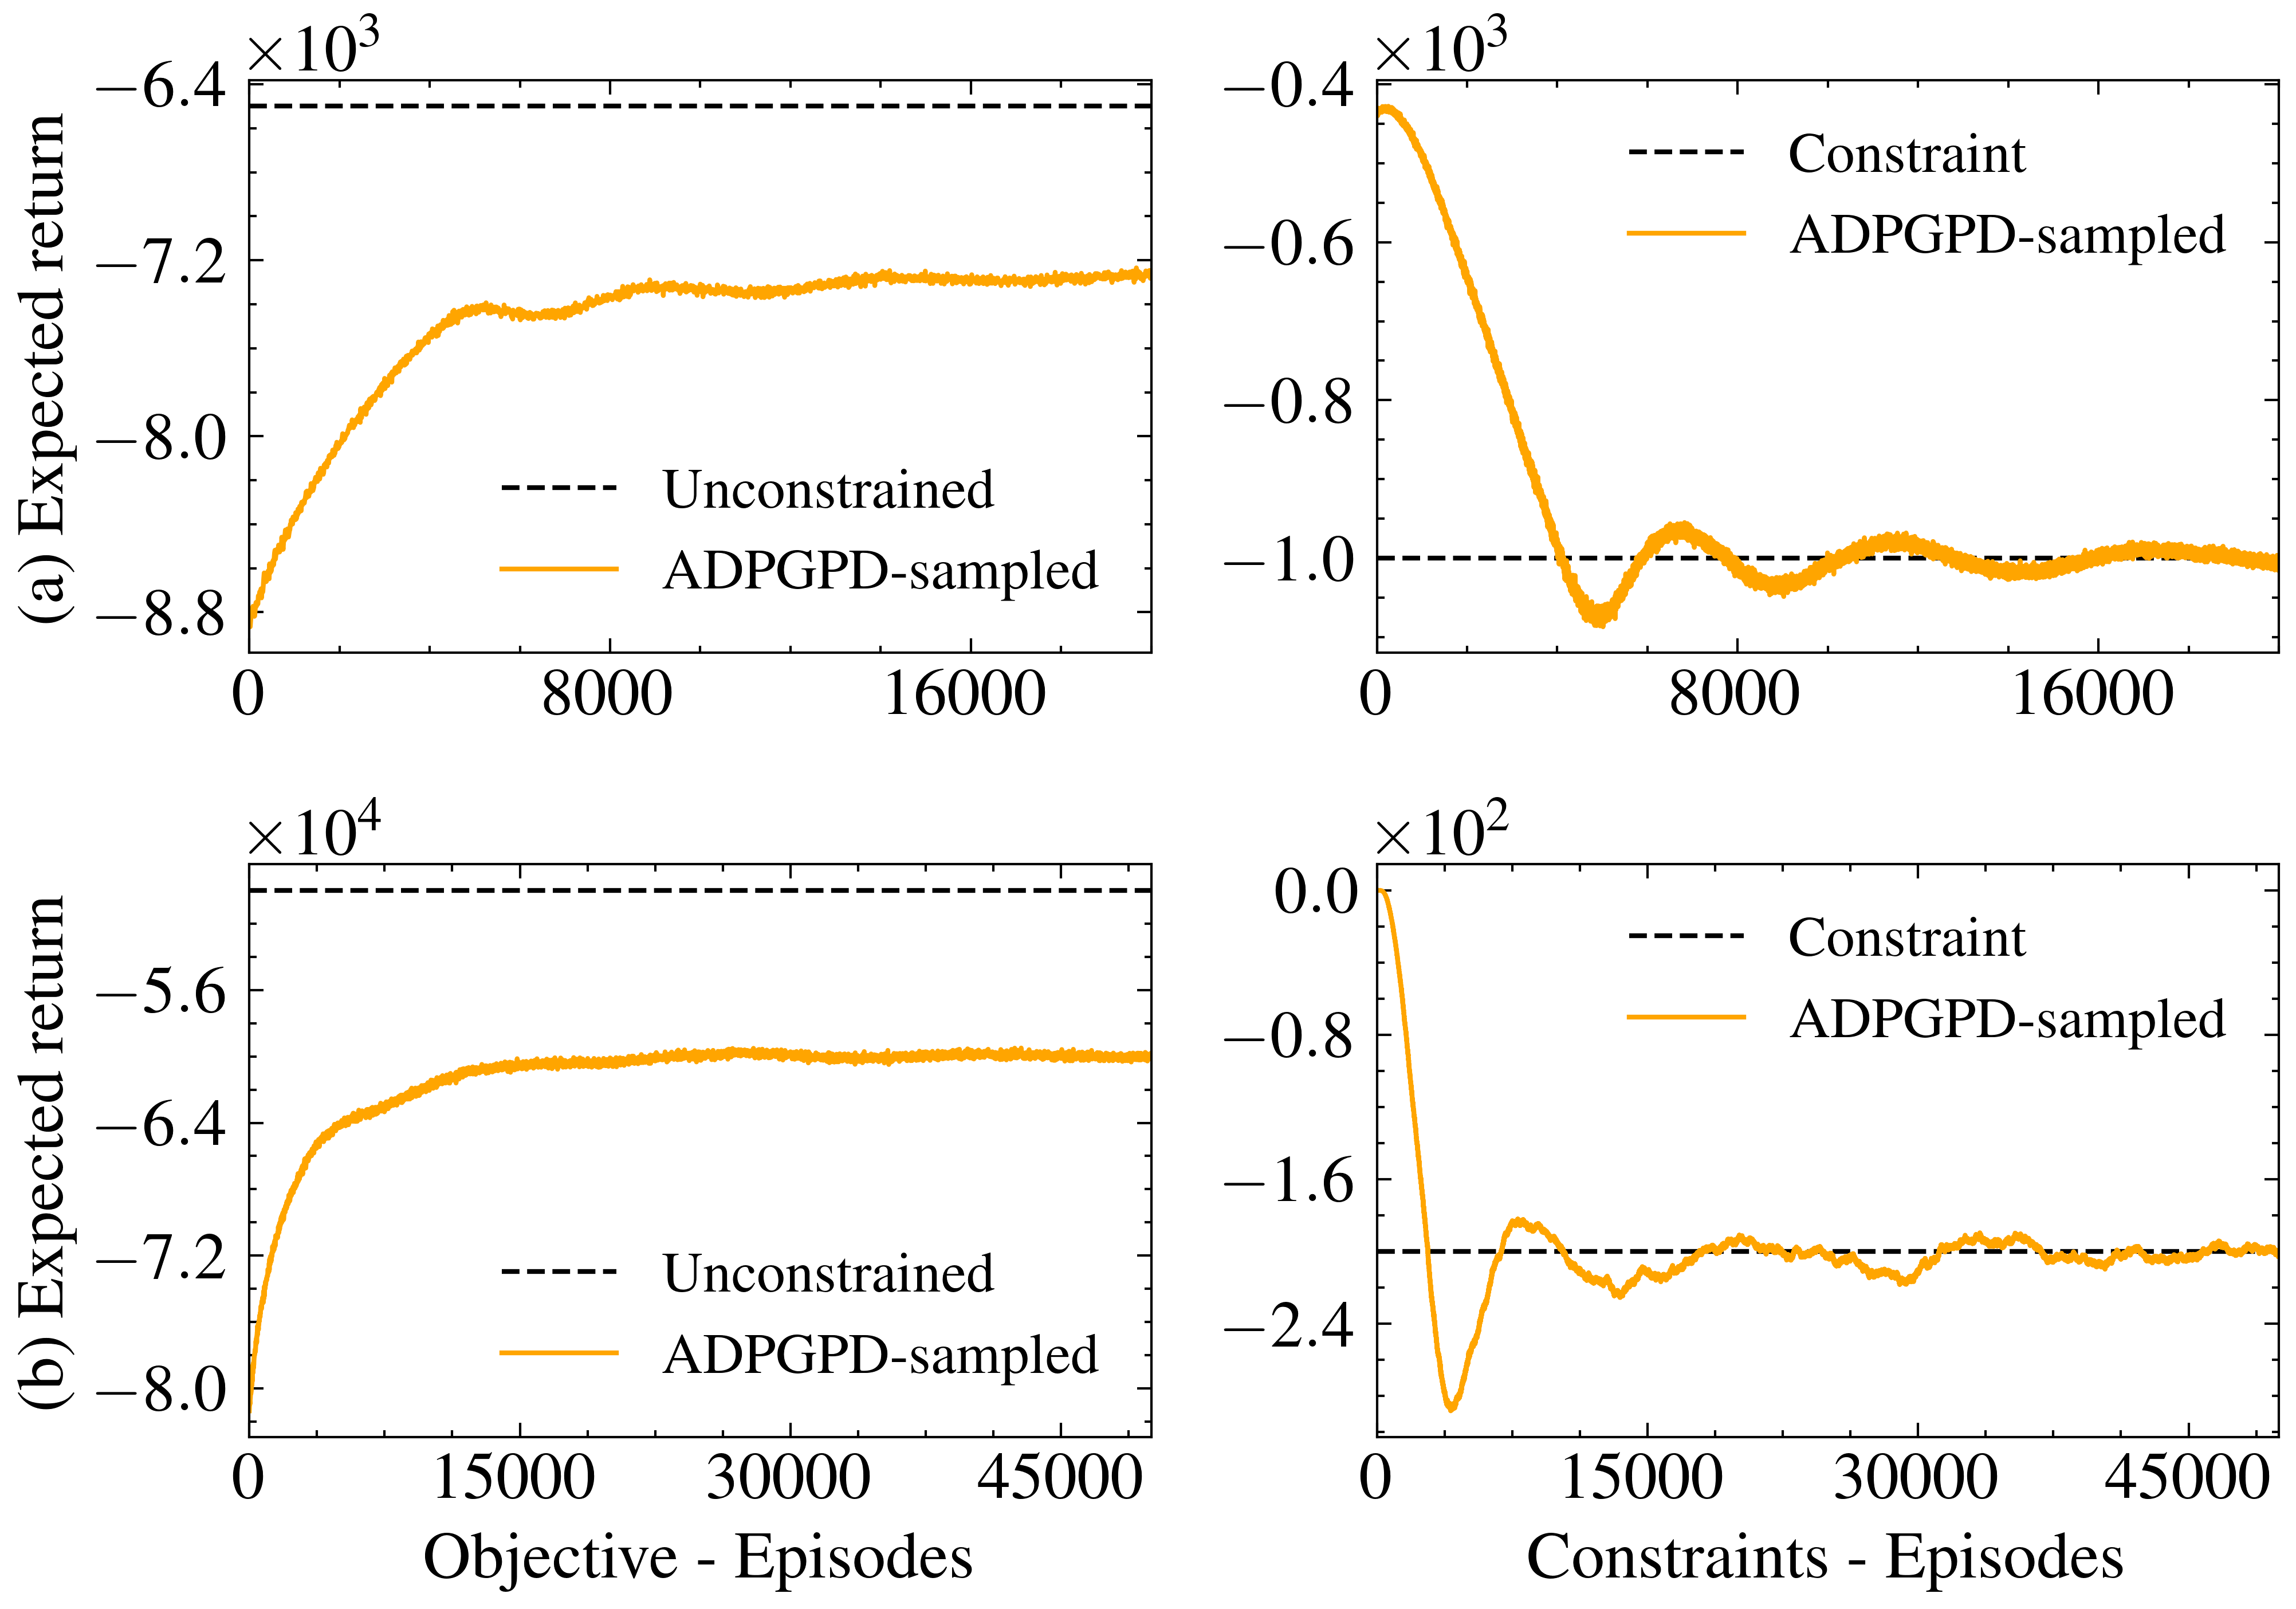

In [82]:
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[7, 5])

    axes[0, 0].axhline(y=-6_500, color='k', linestyle='--', label='Unconstrained')
    #axes[0, 0].plot(np.arange(0, 10000, 10), vel_sampled_primal_nn, label='NN-PGPD', alpha=.8)
    axes[0, 0].plot(np.arange(0, 20000, 10), vel_sampled_primal, label='ADPGPD-sampled', color='orange')
    axes[0, 0].set_xlim(0, 20000)
    axes[0, 0].legend(loc='lower right', fontsize=12)
    axes[0, 0].set_ylabel('(a) Expected return')
    axes[0, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0, 0].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    axes[0, 1].axhline(y=-1000, color='k', linestyle='--', label='Constraint')
    #axes[0, 1].plot(np.arange(0, 10000, 10), vel_sampled_dual_nn, label='NN-PGPD', alpha=.8)
    axes[0, 1].plot(np.arange(20000), vel_sampled_dual, label='ADPGPD-sampled', color='orange')
    axes[0, 1].set_xlim(0, 20000)
    axes[0, 1].legend(fontsize=12)
    axes[0, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0, 1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    #################

    axes[1, 0].axhline(y=-50_000, color='k', linestyle='--', label='Unconstrained')
    #axes[1, 0].plot(np.arange(0, 10000, 10), obs_sampled_primal_nn, label='NN-PGPD', alpha=.8)
    axes[1, 0].plot(np.arange(0, 50000, 10), obs_sampled_primal, label='ADPGPD-sampled', color='orange')
    axes[1, 0].set_xlim(0, 50000)
    axes[1, 0].legend(loc='lower right', fontsize=12)
    axes[1, 0].set_xlabel('Objective - Episodes')
    axes[1, 0].set_ylabel('(b) Expected return')
    axes[1, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1, 0].yaxis.set_major_locator(MaxNLocator(nbins=5))
    axes[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    axes[1, 1].axhline(y=-200, color='k', linestyle='--', label='Constraint')
    #axes[1, 1].plot(np.arange(0, 10000, 10), obs_sampled_dual_nn, label='NN-PGPD', alpha=.8)
    axes[1, 1].plot(np.arange(50000), obs_sampled_dual, label='ADPGPD-sampled', color='orange')
    axes[1, 1].set_xlim(0, 50000)
    #axes[1, 1].set_ylim(-70, 0)
    axes[1, 1].legend(fontsize=12)
    axes[1, 1].set_xlabel('Constraints - Episodes')
    axes[1, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1, 1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    plt.tight_layout()
    plt.show()

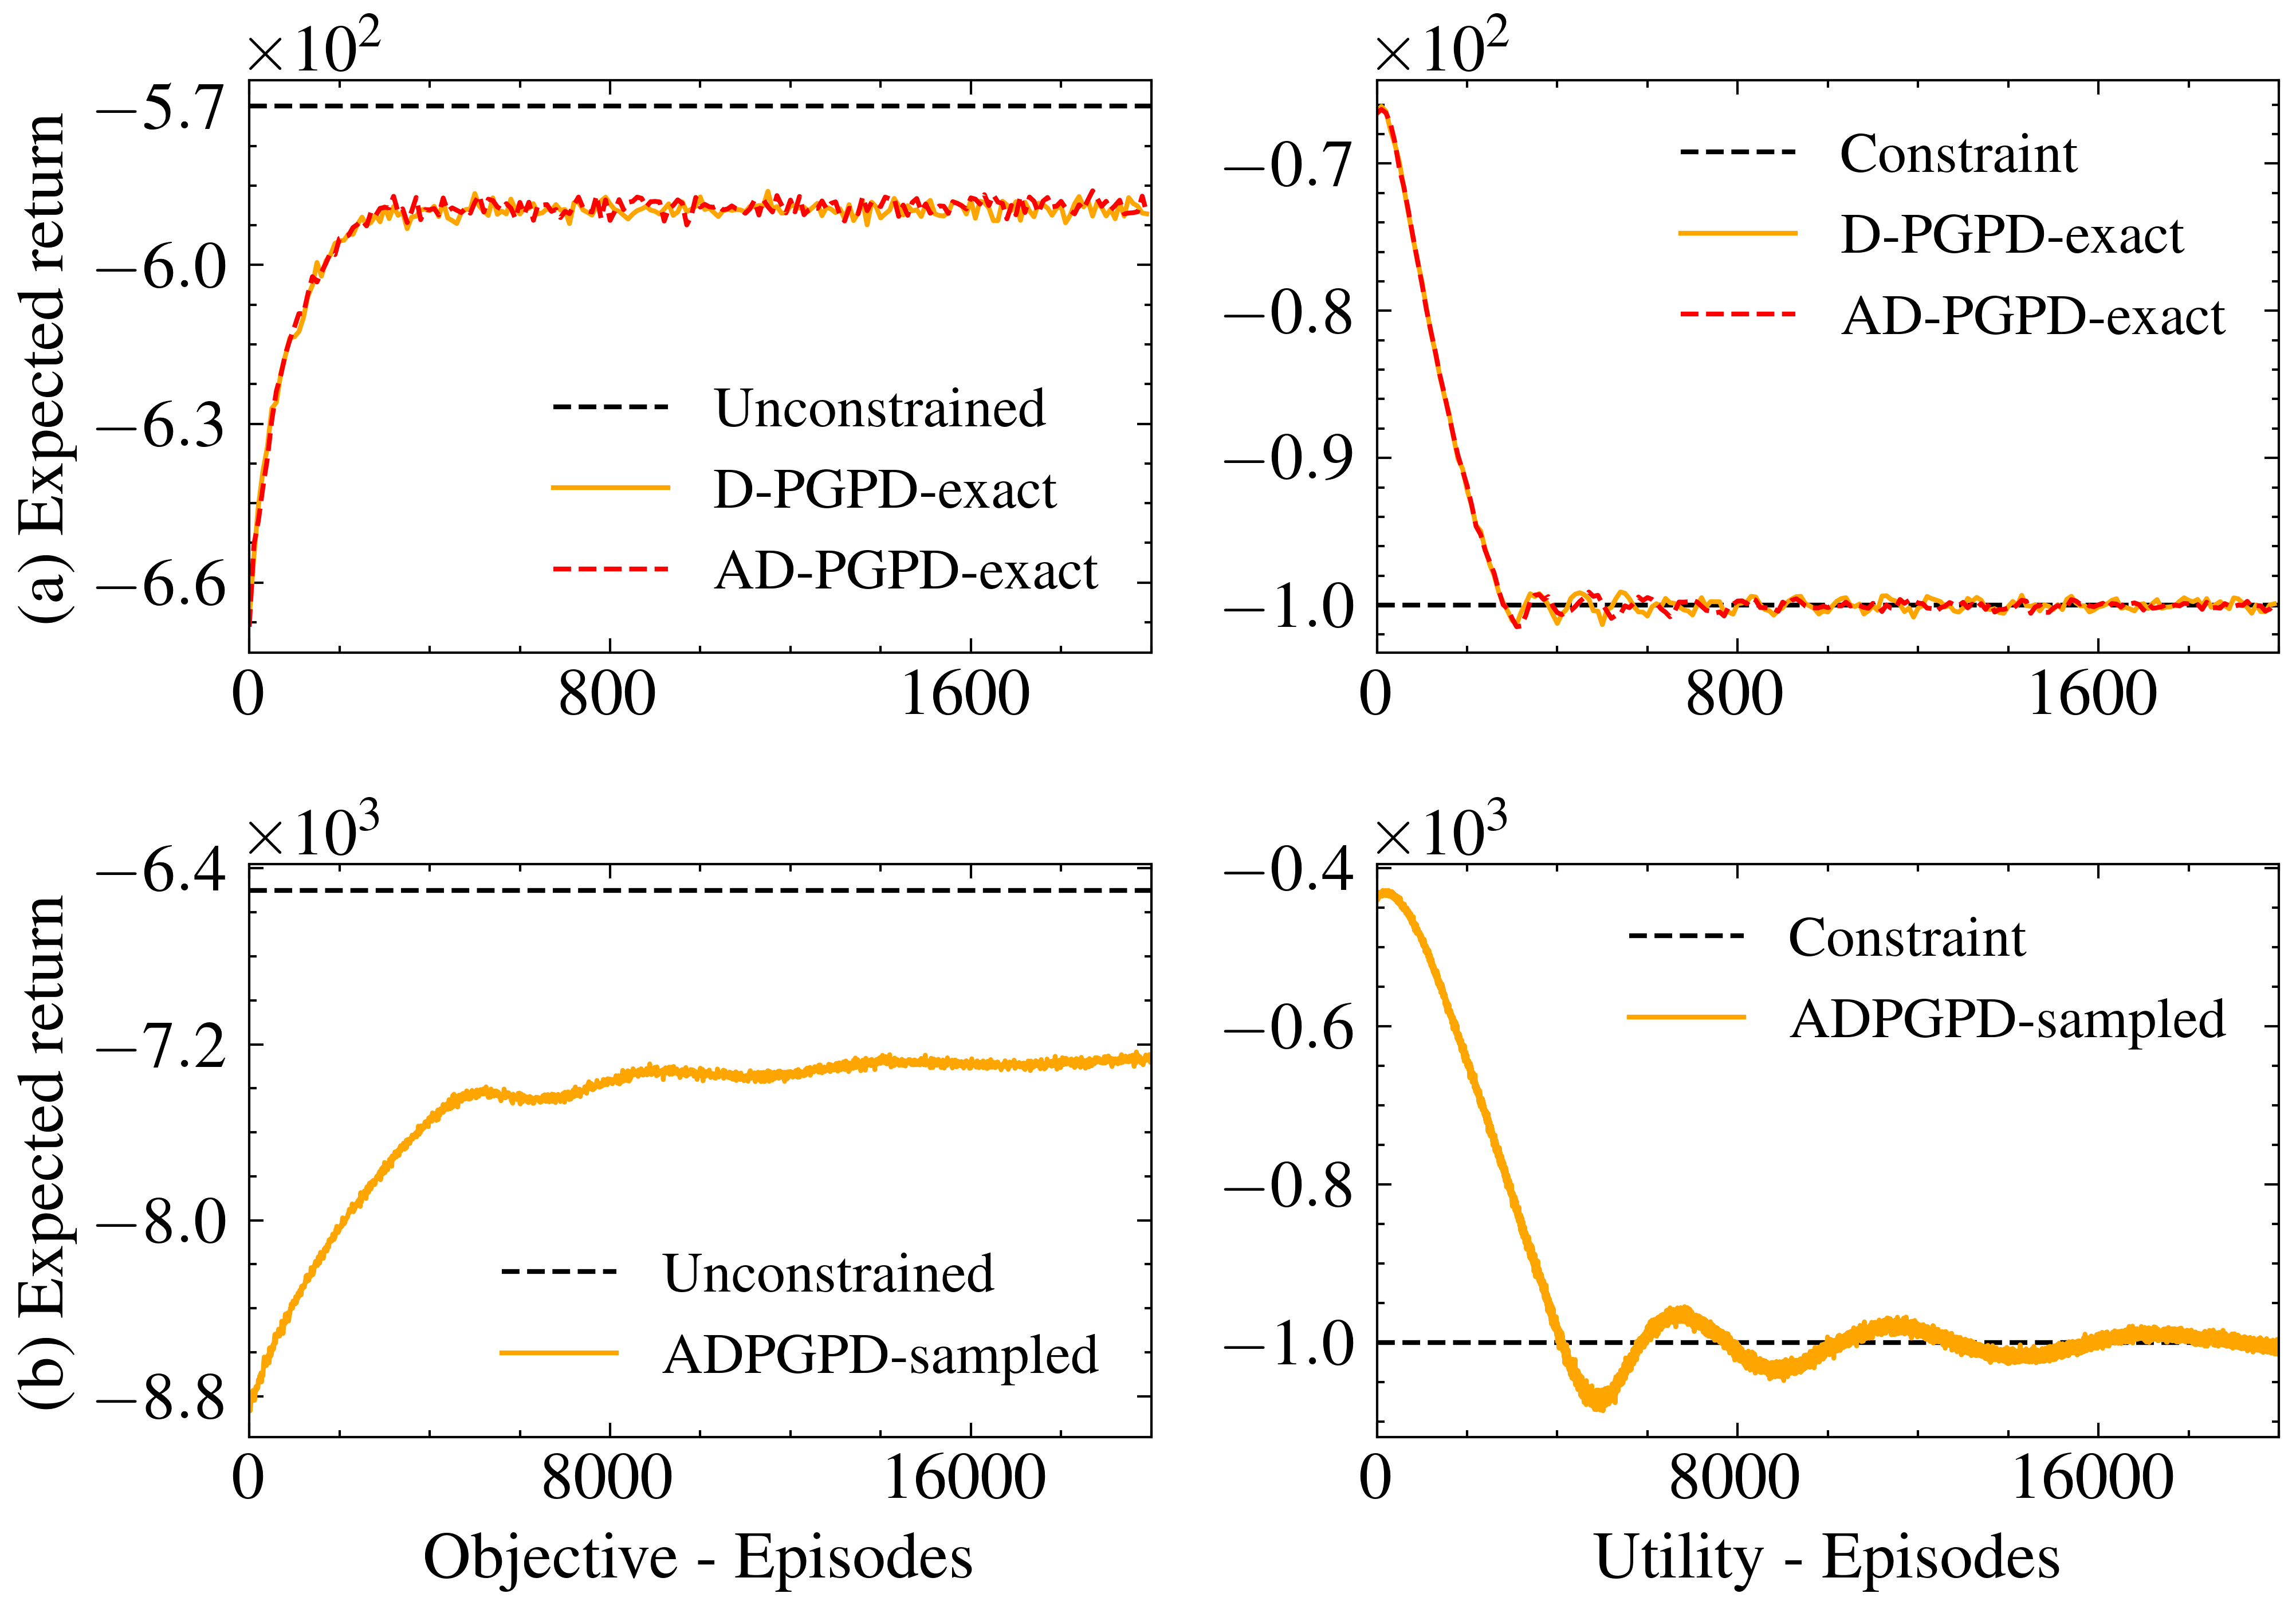

In [83]:
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[7, 5])

    # First subplot
    axes[0, 0].axhline(y=-570, color='k', linestyle='--', label='Unconstrained')
    axes[0, 0].plot(np.arange(0, 2000, 10), vel_primal_exact, label='D-PGPD-exact', color='orange')
    axes[0, 0].plot(np.arange(0, 2000, 10), vel_primal_approx, label='AD-PGPD-exact')
    axes[0, 0].set_xlim(0, 2000)
    axes[0, 0].legend(loc='lower right', fontsize=12)
    axes[0, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0, 0].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
    axes[0, 0].set_ylabel('(a) Expected return')

    # Second subplot
    axes[0, 1].axhline(y=-100, color='k', linestyle='--', label='Constraint')
    axes[0, 1].plot(np.arange(0, 2000, 10), vel_dual_exact, label='D-PGPD-exact', color='orange')
    axes[0, 1].plot(np.arange(0, 2000, 10), vel_dual_approx, label='AD-PGPD-exact')
    axes[0, 1].set_xlim(0, 2000)
    axes[0, 1].legend(fontsize=12)
    axes[0, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0, 1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    # Third subplot
    axes[1, 0].axhline(y=-6_500, color='k', linestyle='--', label='Unconstrained')
    #axes[1, 0].plot(np.arange(0, 10_000, 10), vel_sampled_primal_nn, label='NN-PGPD', alpha=.8)
    axes[1, 0].plot(np.arange(0, 20_000, 10), vel_sampled_primal, label='ADPGPD-sampled', color='orange')
    axes[1, 0].set_xlim(0, 20_000)
    axes[1, 0].legend(loc='lower right', fontsize=12)
    axes[1, 0].set_xlabel('Objective - Episodes')
    axes[1, 0].set_ylabel('(b) Expected return')
    axes[1, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1, 0].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    # Fourth subplot
    axes[1, 1].axhline(y=-1_000, color='k', linestyle='--', label='Constraint')
    #axes[1, 1].plot(np.arange(0, 10_000, 10), vel_sampled_dual_nn, label='NN-PGPD', alpha=.8)
    axes[1, 1].plot(np.arange(20_000), vel_sampled_dual, label='ADPGPD-sampled', color='orange')
    axes[1, 1].set_xlim(0, 20_000)
    axes[1, 1].legend(fontsize=12)
    axes[1, 1].set_xlabel('Utility - Episodes')
    axes[1, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1, 1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    plt.tight_layout()
    plt.show()

In [69]:
burg_sampled_primal = np.load('../results/burg_primal.npy')
burg_sampled_dual = np.load('../results/burg_dual.npy')

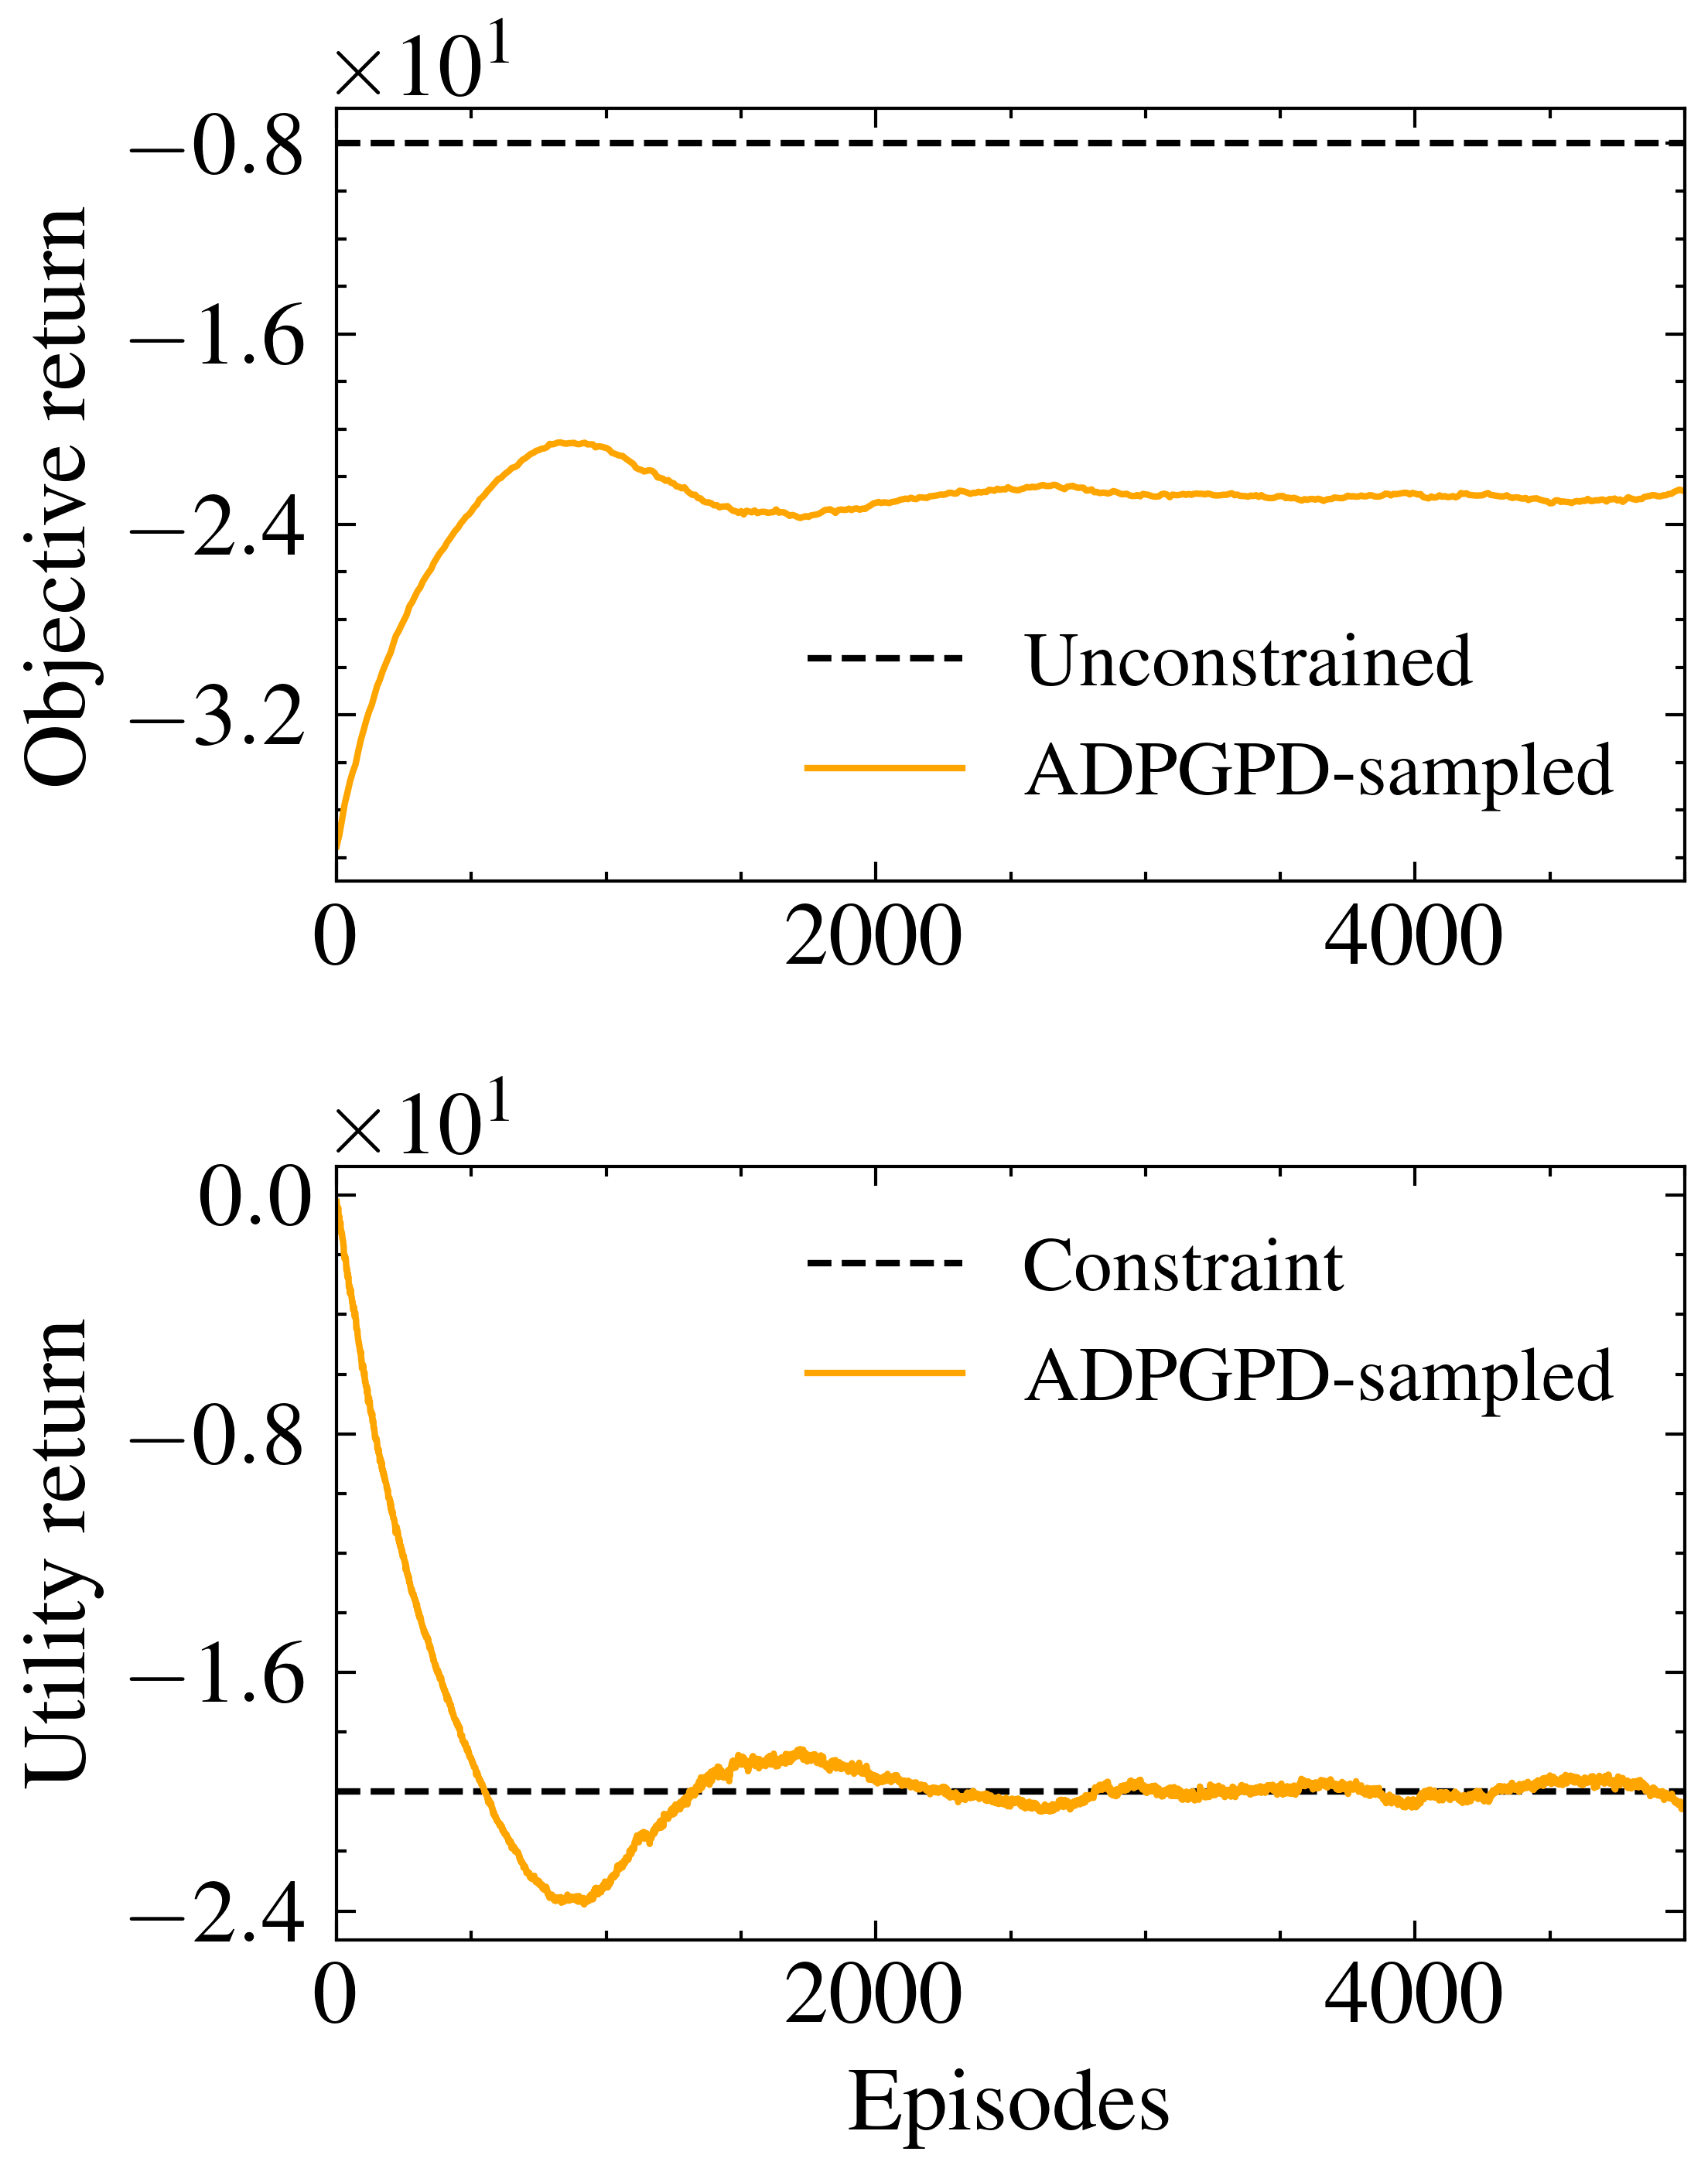

In [84]:
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': 14})
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[4, 5])

    axes[0].axhline(y=-8, color='k', linestyle='--', label='Unconstrained')
    axes[0].plot(np.arange(0, 5_000, 10), burg_sampled_primal, label='ADPGPD-sampled', color='orange')
    axes[0].set_xlim(0, 5_000)
    axes[0].legend(loc='lower right', fontsize=12)
    axes[0].set_ylabel('Objective return')
    axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[0].yaxis.set_major_locator(MaxNLocator(nbins=5))
    axes[0].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[0].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    axes[1].axhline(y=-20, color='k', linestyle='--', label='Constraint')
    axes[1].plot(np.arange(5_000), burg_sampled_dual, label='ADPGPD-sampled', color='orange')
    axes[1].set_xlim(0, 5_000)
    axes[1].legend(fontsize=12)
    axes[1].set_ylabel('Utility return')
    axes[1].set_xlabel('Episodes')
    axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axes[1].yaxis.set_major_locator(MaxNLocator(nbins=4))
    axes[1].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[1].ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    plt.tight_layout()
    plt.show()